In [1]:
import pandas as pd
import os
import json
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
from scipy import stats,signal
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
import random
import re
import csv
from IPython.display import HTML, display, Image
import tabulate
import math as m
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/cbclab/Dropbox/postdocUPF/jatos_experiments')
import my_functions as myf

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 1
#mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 1
#mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fday = [1,2,3,4,5,6,7,8,9,10]
fsession = [1,2]
session_labels = ['Th','Fr','Sa','Su','Mo','Tu','We','Th','Fr','Sa']

SR_color = {'mood': [0.1,0.5,1],'food': [1,0.5,0.1],'sleep': 'y', 'real_stress':[0.1,0.5,0.2]}
PV_color = {'DO':[1,0,0.4],'SO':[0.4,0,1],'NO':'k'}
PV_line = {'DO':'-','SO':'-','NO':'-'}

key_SR = ['mood','food','sleep', 'real_stress']
key_SR_names = {'mood':'mood','food':'food','sleep':'sleep', 'real_stress':'stress'}

key_PV = ['Dsubj_optout_oo','Ssubj_optout_oo','subj_perf_no','OKubj_RT_no','DoverConf','SoverConf','risk_av']
key_name = key_SR+key_PV

pair_keys_SR = list(itertools.combinations(key_SR, 2))

# pair of PV 
pair_keys_PV = list(itertools.combinations(key_PV[:-3], 2))
pair_keys_PV2plot = [pair_keys_PV[:int(len(pair_keys_PV)/2)],pair_keys_PV[int(len(pair_keys_PV)/2):]]
key_name_PV = {'Dsubj_optout_oo':'DO','Ssubj_optout_oo':'SO','subj_perf_no':'acc NO','OKubj_RT_no':'RT NO'}
pair_key_name_PV2plot = [[[key_name_PV[k] for k in tupl] for tupl in lista] for lista in pair_keys_PV2plot]

pair_SR_PV,pair_SR_PV2plot = [],[]
for pv in key_PV:
    aux = []
    for sr in key_SR:
        pair_SR_PV.append((sr,pv))
        aux.append((sr,pv))
    pair_SR_PV2plot.append(aux)

key_diff = ['Dperf_oo', 'Sperf_oo', 'perf_no', 'Dn_trials_oo', 'Sn_trials_oo', 'NOn_trials', \
            'DRT_OKoo', 'SRT_OKoo', 'RT_no', 'RT_noNOK', 'Doptout', 'Soptout']

unique_signals_dots = [1,2,3,4]
unique_signals_gabor = [1,2,3]

main_path = '/home/cbclab/Dropbox/postdocUPF/jatos_experiments'

path_results_dots = main_path + '/dots/notebooks/results_tanda_1/'
path_results_gabor = main_path + '/gabor/notebooks/results_tanda_1/'

In [2]:
file=path_results_dots+'mean_across_participants.json'
with open(file) as f:
    as_dots = json.load(f)
file=path_results_dots+'se_across_participants.json'
with open(file) as f:
    se_dots = json.load(f)

In [3]:
file=path_results_gabor+'mean_across_participants.json'
with open(file) as f:
    as_gabor = json.load(f)
file=path_results_gabor+'se_across_participants.json'
with open(file) as f:
    se_gabor = json.load(f)

# Figura 2

In [4]:
key_SR = ['mood','food','sleep', 'real_stress']
key_SR2plot = [key_SR[:int(len(key_SR)/2)],key_SR[int(len(key_SR)/2):]]

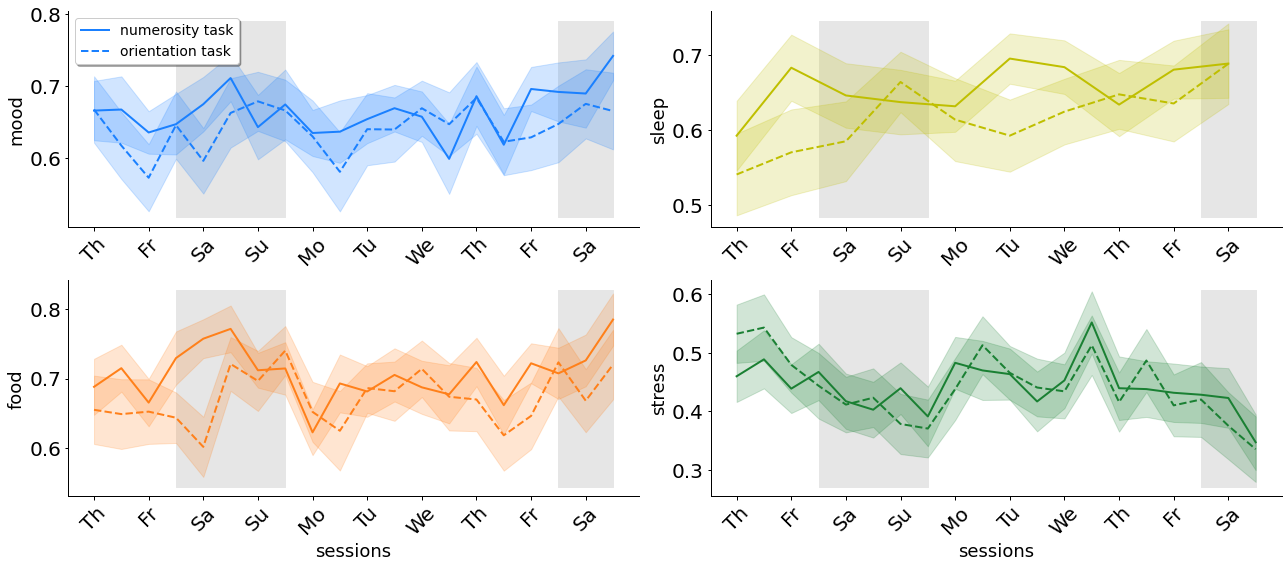

In [6]:
fig, ax = plt.subplots(2,2,figsize=(18,8))
plt.subplots_adjust(hspace = 0.3)  

for i in range(2):
    for j in range(2):
        # GRAY SHADOW
        lower_limit_dots = np.min(as_dots[key_SR2plot[j][i]])-np.max(se_dots[key_SR2plot[j][i]])
        upper_limit_dots = np.max(as_dots[key_SR2plot[j][i]])+np.max(se_dots[key_SR2plot[j][i]])
        lower_limit_gabor = np.min(as_gabor[key_SR2plot[j][i]])-np.max(se_gabor[key_SR2plot[j][i]])
        upper_limit_gabor = np.max(as_gabor[key_SR2plot[j][i]])+np.max(se_gabor[key_SR2plot[j][i]])
        lower_limit = min(lower_limit_gabor,lower_limit_dots)
        upper_limit = max(upper_limit_gabor,upper_limit_dots)
        ax[i,j].fill_between([4,8],lower_limit,upper_limit,color=[0.9,0.9,0.9])
        ax[i,j].fill_between([18,20],lower_limit,upper_limit,color=[0.9,0.9,0.9])
        # DOTS
        ax[i,j].set_xticks(np.arange(1,21)[::2])
        ax[i,j].set_xticklabels(session_labels,rotation=45)
        if key_SR2plot[j][i]=='real_stress':
            label = 'stress'
        else:
            label = key_SR2plot[j][i]
        #ax[i,j].set_ylabel(label)
        if key_SR2plot[j][i]!='sleep':
            ax[i,j].plot(np.arange(1,len(as_dots[key_SR2plot[j][i]])+1), as_dots[key_SR2plot[j][i]], color = SR_color[key_SR2plot[j][i]])
            ax[i,j].fill_between(np.arange(1,len(as_dots[key_SR2plot[j][i]])+1),\
                                 np.array(as_dots[key_SR2plot[j][i]])-se_dots[key_SR2plot[j][i]], 
                                 np.array(as_dots[key_SR2plot[j][i]])+se_dots[key_SR2plot[j][i]], alpha=0.2, color = SR_color[key_SR2plot[j][i]])
        else:
            ax[i,j].plot(np.arange(1,21)[::2],as_dots[key_SR2plot[j][i]],color = SR_color[key_SR2plot[j][i]])
            ax[i,j].fill_between(np.arange(1,21)[::2],\
                       np.array(as_dots[key_SR2plot[j][i]])-se_dots[key_SR2plot[j][i]], \
                       np.array(as_dots[key_SR2plot[j][i]])+se_dots[key_SR2plot[j][i]], alpha=0.2, color = SR_color[key_SR2plot[j][i]])
        # GABOR
        ax[i,j].set_xticks(np.arange(1,21)[::2])
        ax[i,j].set_xticklabels(session_labels,rotation=45)
        if key_SR2plot[j][i]=='real_stress':
            label = 'stress'
        else:
            label = key_SR2plot[j][i]
        ax[i,j].set_ylabel(label)
        if key_SR2plot[j][i]!='sleep':
            ax[i,j].plot(np.arange(1,len(as_gabor[key_SR2plot[j][i]])+1), as_gabor[key_SR2plot[j][i]], color = SR_color[key_SR2plot[j][i]],ls='--')
            ax[i,j].fill_between(np.arange(1,len(as_gabor[key_SR2plot[j][i]])+1),\
                                 np.array(as_gabor[key_SR2plot[j][i]])-se_gabor[key_SR2plot[j][i]], 
                                 np.array(as_gabor[key_SR2plot[j][i]])+se_gabor[key_SR2plot[j][i]], alpha=0.2, color = SR_color[key_SR2plot[j][i]])
        else:
            ax[i,j].plot(np.arange(1,21)[::2],as_gabor[key_SR2plot[j][i]],color = SR_color[key_SR2plot[j][i]],ls='--')
            ax[i,j].fill_between(np.arange(1,21)[::2],\
                       np.array(as_gabor[key_SR2plot[j][i]])-se_gabor[key_SR2plot[j][i]], \
                       np.array(as_gabor[key_SR2plot[j][i]])+se_gabor[key_SR2plot[j][i]], alpha=0.2, color = SR_color[key_SR2plot[j][i]])
ax[0,0].legend(("numerosity task","orientation task"),loc='upper left', shadow=True,fontsize=14)
ax[1,0].set_xlabel('sessions')
ax[1,1].set_xlabel('sessions')
plt.tight_layout()
#plt.savefig('fig2_mean_SR_across_participants.png')
plt.savefig('fig2_mean_SR_across_participants.pdf')
plt.show()

In [6]:
file=path_results_dots+'ACC_SR.json'
with open(file) as f:
    ACC_SR_dots = json.load(f)

In [7]:
file=path_results_gabor+'ACC_SR.json'
with open(file) as f:
    ACC_SR_gabor = json.load(f)

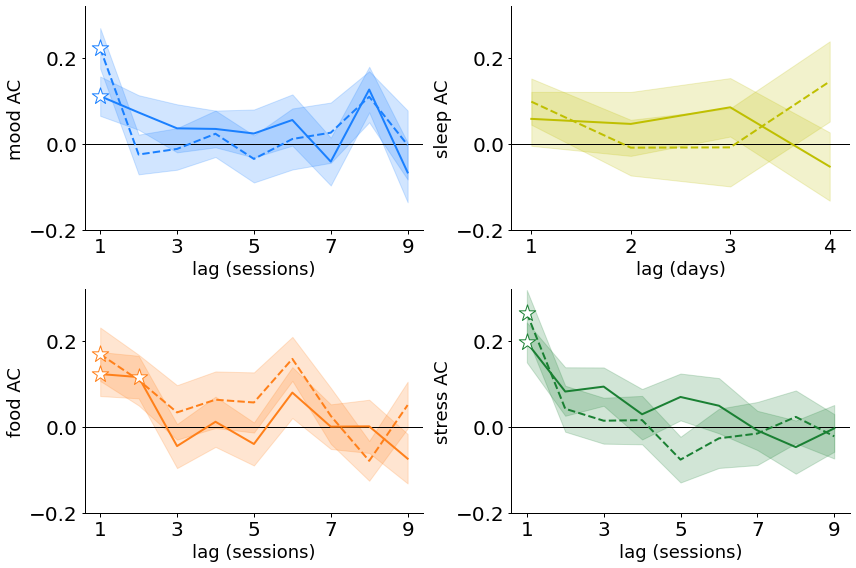

In [9]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
plt.subplots_adjust(hspace = 0.8)  
plt.subplots_adjust(wspace = 0.3)  

for i in range(2):
    for k in range(2):
        ax[i,k].set_ylim(-0.2,0.32)
        ax[i,k].axhline(0.0,c='k',lw=1)
        ax[i,k].set_xticks(np.arange(1,10,2))
        ax[i,k].set_xlabel('lag (sessions)')
        # DOTS
        for j in range(1,len(ACC_SR_dots[key_SR2plot[k][i]]['mean'])+1):
            if ACC_SR_dots[key_SR2plot[k][i]]['pgranger'][j-1]<0.05:
                ax[i,k].scatter(j,ACC_SR_dots[key_SR2plot[k][i]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors = SR_color[key_SR2plot[k][i]], zorder=3)
        ax[i,k].plot(np.arange(1,len(ACC_SR_dots[key_SR2plot[k][i]]['mean'])+1),ACC_SR_dots[key_SR2plot[k][i]]['mean'], color = SR_color[key_SR2plot[k][i]], zorder=2)
        ax[i,k].fill_between(np.arange(1,len(ACC_SR_dots[key_SR2plot[k][i]]['mean'])+1),\
                             np.array(ACC_SR_dots[key_SR2plot[k][i]]['mean'])-np.array(ACC_SR_dots[key_SR2plot[k][i]]['se']), \
                           np.array(ACC_SR_dots[key_SR2plot[k][i]]['mean'])+np.array(ACC_SR_dots[key_SR2plot[k][i]]['se']), color = SR_color[key_SR2plot[k][i]], alpha=0.2)
        # GABOR
        for j in range(1,len(ACC_SR_gabor[key_SR2plot[k][i]]['mean'])+1):
            if ACC_SR_gabor[key_SR2plot[k][i]]['pgranger'][j-1]<0.05:  
                ax[i,k].scatter(j,ACC_SR_gabor[key_SR2plot[k][i]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors = SR_color[key_SR2plot[k][i]],zorder=3)
        ax[i,k].plot(np.arange(1,len(ACC_SR_gabor[key_SR2plot[k][i]]['mean'])+1),ACC_SR_gabor[key_SR2plot[k][i]]['mean'], color = SR_color[key_SR2plot[k][i]],ls='--', zorder=2)
        ax[i,k].fill_between(np.arange(1,len(ACC_SR_gabor[key_SR2plot[k][i]]['mean'])+1),\
                             np.array(ACC_SR_gabor[key_SR2plot[k][i]]['mean'])-np.array(ACC_SR_gabor[key_SR2plot[k][i]]['se']), \
                           np.array(ACC_SR_gabor[key_SR2plot[k][i]]['mean'])+np.array(ACC_SR_gabor[key_SR2plot[k][i]]['se']), color = SR_color[key_SR2plot[k][i]], alpha=0.2)
        if key_SR2plot[k][i]=='real_stress':
            label_ = 'stress'
        else:
            label_ = key_SR2plot[k][i]
        ax[i,k].set_ylabel(label_+' AC')
        
ax[0,1].set_xlim(0.8,4.2)        
ax[0,1].set_xticks(np.arange(1,5,1))
ax[0,1].set_xlabel('lag (days)')    
plt.tight_layout()
plt.savefig('fig2_SR_ACC.png')
plt.show()

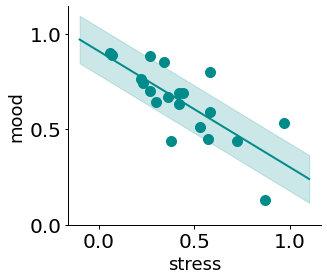

In [10]:
fex='ex3053.json'
with open(path_results_dots+fex) as fex:
    data_ex = json.load(fex)
for k, v in data_ex.items():
    globals()[k]=v  

fig = plt.figure()
plt.scatter(stress3053,mood3053,color='darkcyan')
plt.ylabel('mood')
plt.xlabel('stress') 
plt.plot(np.arange(-0.1,1.1,0.1),intercept+slope*np.arange(-0.1,1.1,0.1),color='darkcyan')
plt.fill_between(np.arange(-0.1,1.1,0.1),intercept+slope*np.arange(-0.1,1.1,0.1)-stderr, \
                   intercept+slope*np.arange(-0.1,1.1,0.1)+stderr, color='darkcyan', alpha=0.2)
plt.yticks([0.0,0.5,1.0])
plt.xticks([0.0,0.5,1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig('fig2_stressVSmood_single_subject.png')
plt.show()

In [11]:
f='corrSR.json'
with open(path_results_dots+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_dots']=v  

In [12]:
# convert string key into tuples

new_key = {}
for k,v in corr_SR_dots.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_SR_dots[v] = corr_SR_dots.pop(k)
    p_SR_dots[v] = p_SR_dots.pop(k)
    SIG_SR_dots[v] = SIG_SR_dots.pop(k)
    NOS_SR_dots[v] = NOS_SR_dots.pop(k)

In [13]:
f='corrSR.json'
with open(path_results_gabor+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_gabor']=v  

In [14]:
# convert string key into tuples

new_key = {}
for k,v in corr_SR_gabor.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_SR_gabor[v] = corr_SR_gabor.pop(k)
    p_SR_gabor[v] = p_SR_gabor.pop(k)
    SIG_SR_gabor[v] = SIG_SR_gabor.pop(k)
    NOS_SR_gabor[v] = NOS_SR_gabor.pop(k)

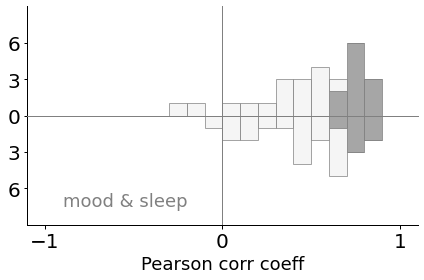

In [15]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_SR_dots[('mood','sleep')],NOS_SR_dots[('mood','sleep')]],bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
             color=['gray',[0.95,0.95,0.95]], edgecolor='gray', linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(0,9)
ax1.set_xticks([])
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('gray')
ax1.axvline(0.0,c='gray',lw=1)

ax2.hist([SIG_SR_gabor[('mood','sleep')],NOS_SR_gabor[('mood','sleep')]],bins=np.arange(-1,1,0.1),color=['gray',[0.95,0.95,0.95]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor='gray', linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,9)
ax2.invert_yaxis()
ax2.set_xlabel('Pearson corr coeff')
ax2.text(-0.9,7.5,"mood & sleep", ha='left', wrap=True,fontsize=18,color='gray')
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('gray')
ax2.axvline(0.0,c='gray',lw=1)

plt.tight_layout()
plt.savefig('fig2_corr_mood_sleep.png')
plt.show()

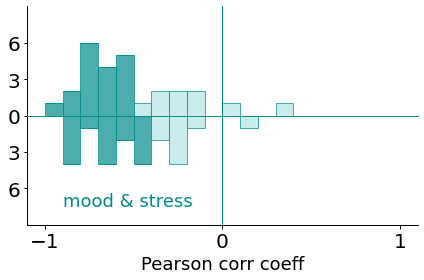

In [16]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_SR_dots[('mood','real_stress')],NOS_SR_dots[('mood','real_stress')]],bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
             color=['darkcyan',[0.7,0.9,0.9]], edgecolor='darkcyan', linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(0,9)
ax1.set_xticks([])
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('darkcyan')
ax1.axvline(0.0,c='darkcyan',lw=1)

ax2.hist([SIG_SR_gabor[('mood','real_stress')],NOS_SR_gabor[('mood','real_stress')]],bins=np.arange(-1,1,0.1),color=['darkcyan',[0.7,0.9,0.9]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor='darkcyan', linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,9)
ax2.invert_yaxis()
ax2.set_xlabel('Pearson corr coeff')
ax2.text(-0.9,7.5,"mood & stress", ha='left', wrap=True,fontsize=18,color='darkcyan')
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('darkcyan')
ax2.axvline(0.0,c='darkcyan',lw=1)

plt.tight_layout()
plt.savefig('fig2_corr_mood_stress.png')
plt.show()

In [17]:
round_p_SR = [myf.roundP(p_SR_dots[(pair)]) for pair in pair_keys_SR]
round_p_SR = myf.symmetrize(round_p_SR)

p_corr_reports_dots=[]
ind = -1
for key in key_SR:
    ind += 1
    p_corr_reports_dots.append(list(round_p_SR[ind]))

In [18]:
round_r_SR = [myf.roundP(np.mean(corr_SR_dots[(pair)])) for pair in pair_keys_SR]
round_r_SR = myf.symmetrize(round_r_SR)+np.identity(len(key_SR))

Rcorr_reports_dots=[]
ind = -1
for key in key_SR:
    ind += 1
    Rcorr_reports_dots.append(list(round_r_SR[ind]))

In [19]:
[key_SR_names[k] for k in key_SR]

['mood', 'food', 'sleep', 'stress']

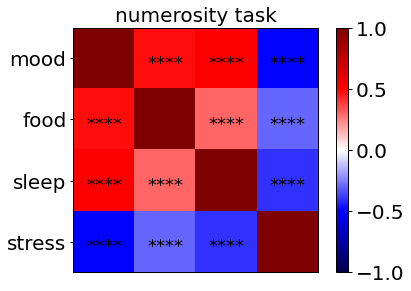

In [20]:
plt.figure(figsize=(6.5,4.5))
plt.imshow(Rcorr_reports_dots,cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(np.arange(4),[])
plt.yticks(np.arange(4),[key_SR_names[k] for k in key_SR])
plt.colorbar()
plt.title('numerosity task')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.xticks([], [])
for i in range(4):
    for j in range(4):
        if i!=j:
            posy = j+0.16
            plt.text(i,posy,myf.p_stars(p_corr_reports_dots[i][j]),fontsize=18, ha='center', wrap=True)
#plt.tight_layout()
plt.savefig('fig2_reports_corr_dots.png')
plt.show()

In [21]:
round_p_SR = [myf.roundP(p_SR_gabor[(pair)]) for pair in pair_keys_SR]
round_p_SR = myf.symmetrize(round_p_SR)

p_corr_reports_gabor=[]
ind = -1
for key in key_SR:
    ind += 1
    p_corr_reports_gabor.append(list(round_p_SR[ind]))

In [22]:
round_r_SR = [myf.roundP(np.mean(corr_SR_gabor[(pair)])) for pair in pair_keys_SR]
round_r_SR = myf.symmetrize(round_r_SR)+np.identity(len(key_SR))

Rcorr_reports_gabor=[]
ind = -1
for key in key_SR:
    ind += 1
    Rcorr_reports_gabor.append(list(round_r_SR[ind]))

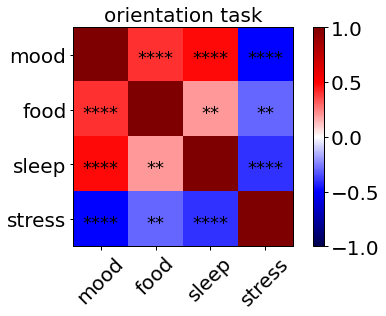

In [23]:
plt.figure(figsize=(6.5,4.5))
plt.imshow(Rcorr_reports_gabor,cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(np.arange(4),[])
plt.yticks(np.arange(4),[key_SR_names[k] for k in key_SR])
plt.xticks(np.arange(4),[key_SR_names[k] for k in key_SR],rotation = 45)
plt.colorbar()
plt.title('orientation task')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
for i in range(4):
    for j in range(4):
        if i!=j:
            posy = j+0.16
            plt.text(i,posy,myf.p_stars(p_corr_reports_gabor[i][j]),fontsize=18, ha='center', wrap=True)
plt.tight_layout()
plt.savefig('fig2_reports_corr_gabor.png')
plt.show()

In [28]:
sorted_pSR_gabor = sorted([p_SR_gabor[pair] for pair in pair_keys_SR])

In [33]:
sorted_pSR_gabor

[6.623025779373259e-09,
 2.176499951059863e-08,
 6.089908534216859e-08,
 9.157653528931864e-06,
 0.0010086323236322742,
 0.004993815869700306]

In [31]:
for i in range(6):
    print(sorted_pSR_gabor[i]*(6+1-(i+1)))

3.973815467623955e-08
1.0882499755299315e-07
2.4359634136867437e-07
2.747296058679559e-05
0.0020172646472645483
0.004993815869700306


In [32]:
for i in range(6):
    print(sorted_pSR_gabor[i]*6)

3.973815467623955e-08
1.305899970635918e-07
3.653945120530116e-07
5.494592117359118e-05
0.0060517939417936446
0.029962895218201835
